<a href="https://colab.research.google.com/github/ruoroj/ProjectWeekPractice/blob/main/Transformer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
!pip install wandb

import wandb


In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# %env WANDB_PROJECT= Twitter_Mental_Health_Class

env: WANDB_PROJECT=twitter_cime_classification


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 8.3 MB/s 
     |████████████████████████████████| 3.3 MB 31.7 MB/s 
     |████████████████████████████████| 895 kB 55.8 MB/s 
     |████████████████████████████████| 636 kB 68.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Hugging Face

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 97 kB/s 
     |████████████████████████████████| 6.8 MB 17.9 MB/s 
     |████████████████████████████████| 981 kB 57.6 MB/s 
     |████████████████████████████████| 263 kB 52.8 MB/s 
     |████████████████████████████████| 1.9 MB 55.4 MB/s 
     |████████████████████████████████| 1.2 MB 40.8 MB/s 
     |████████████████████████████████| 468 kB 66.2 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.2-py3-none-any.whl size=25283088 sha256=e3f5e7e60fdaf8c479581451b9c4245a1b7f4cbd1606b3a0d9a9d25dd8ddf2b5
  Stored in directory: /root/.cache/pip/wheels/88/be/4a/971c83a380a40f12e877f643ca1b94dc65f528f94c88dbcff7
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=e0687e9cb4fbc0f66c1c0198107ed3f3d34b973116faf9f2d3764028b25f7f0b
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff05c722d142b7d20a88ad63f9aab11b895411241a4
  Created wheel for keras-bert: filename=keras_bert-0.88.0-py3-none-any.whl

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
import ktrain
from ktrain import text
import pandas as pd

In [ ]:
# read data
df = pd.read_csv('/content/MentalHealth (4).csv')
df.head()

,Unnamed: 0,tweet,location,disorder,hour,clean_tweet,clean_tweet_tok
0,0,shock young man climbs top hospital building k...,"nairobi, kenya",4,10,shock young man climbs top hospital building k...,"['shock', 'young', 'man', 'climbs', 'top', 'ho..."
1,1,people tend hide depression drinking drugs tak...,"nairobi, kenya",4,10,people tend hide depression drinking drugs tak...,"['people', 'tend', 'hide', 'depression', 'drin..."
2,2,lily_nganga depression,nairobi,4,9,lily_nganga depression,"['lily_nganga', 'depression']"
3,3,itumbi subjected bloggers depression ought beh...,"nairobi, kenya",4,8,itumbi subjected bloggers depression ought beh...,"['itumbi', 'subjected', 'bloggers', 'depressio..."
4,4,mental health isnt anxiety amp depression nagg...,"nairobi, kenya",4,8,mental health isnt anxiety amp depression nagg...,"['mental', 'health', 'isnt', 'anxiety', 'amp',..."


In [ ]:
# craeting a dataframe with the tweet and target column
df1= df[['clean_tweet_tok','disorder']]
df1.head()

,clean_tweet_tok,disorder
0,"['shock', 'young', 'man', 'climbs', 'top', 'ho...",4
1,"['people', 'tend', 'hide', 'depression', 'drin...",4
2,"['lily_nganga', 'depression']",4
3,"['itumbi', 'subjected', 'bloggers', 'depressio...",4
4,"['mental', 'health', 'isnt', 'anxiety', 'amp',...",4


In [ ]:
# Defining our X and Y varaibles
X = df1['clean_tweet_tok']
y= df1['disorder']
print(X.head())
print('/n')
print(y.head())

0    ['shock', 'young', 'man', 'climbs', 'top', 'ho...
1    ['people', 'tend', 'hide', 'depression', 'drin...
2                        ['lily_nganga', 'depression']
3    ['itumbi', 'subjected', 'bloggers', 'depressio...
4    ['mental', 'health', 'isnt', 'anxiety', 'amp',...
Name: clean_tweet_tok, dtype: object
/n
0    4
1    4
2    4
3    4
4    4
Name: disorder, dtype: int64


In [ ]:
# Splitting our data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
# checking our classes
df1.disorder.unique()

array([4, 1, 0, 5, 6, 7, 3, 2])

In [ ]:
# creating a list varaiable for our classes
target = [4, 1, 0, 5, 6, 7, 3, 2]

In [ ]:
# converting our train varaibles to numpy array
X_train= X_train.to_numpy()
y_train= y_train.to_numpy()


In [ ]:
# converting our test varaibles to numpy array
X_test= X_test.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# defining our model object and preprocessing our data
MODEL_NAME = 'distilbert-base-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500, class_names= target)
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 9
	95percentile : 14
	99percentile : 15


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 9
	95percentile : 14
	99percentile : 16


Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

**Estimate a Good Learning Rate**

Learning rates between 2e-5 and 5e-5 tend to work well with transformer models based on papers from Google. However, we will run our learning-rate-finder for two epochs to estimate the LR on this particular dataset.



simulating training for different learning rates... this may take a few moments...
Epoch 1/10
84/84 [==============================] - 37s 326ms/step - loss: 2.0254 - accuracy: 0.3988
Epoch 2/10
84/84 [==============================] - 28s 332ms/step - loss: 1.8684 - accuracy: 0.4320
Epoch 3/10
84/84 [==============================] - 28s 333ms/step - loss: 1.3635 - accuracy: 0.4880
Epoch 4/10
84/84 [==============================] - 28s 337ms/step - loss: 0.7292 - accuracy: 0.7800
Epoch 5/10
84/84 [==============================] - 28s 339ms/step - loss: 0.9984 - accuracy: 0.6140
Epoch 6/10
84/84 [==============================] - 29s 341ms/step - loss: 1.4730 - accuracy: 0.4080
Epoch 7/10
84/84 [==============================] - 29s 342ms/step - loss: 1.8847 - accuracy: 0.3800
Epoch 8/10
84/84 [==============================] - 3s 27ms/step - loss: 17.5925 - accuracy: 0.3409


done.
Visually inspect loss plot and select learning rate associated with falling loss


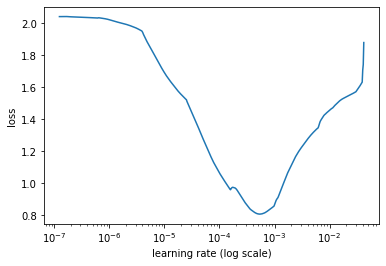

In [ ]:
learner.lr_find(show_plot=True, max_epochs=10)

**Train Model**

Train using a 1cycle learning rate schedule.

Using 1e5 learning rate. From the graph we can see it is our most suitable learning rate

In [ ]:
learner.fit_onecycle(1e-5, 10)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
85/85 [==============================] - 38s 365ms/step - loss: 1.9100 - accuracy: 0.4427 - val_loss: 1.6211 - val_accuracy: 0.4960
Epoch 2/10
85/85 [==============================] - 30s 350ms/step - loss: 1.4897 - accuracy: 0.4526 - val_loss: 1.2647 - val_accuracy: 0.4960
Epoch 3/10
85/85 [==============================] - 30s 352ms/step - loss: 1.2605 - accuracy: 0.6126 - val_loss: 1.0273 - val_accuracy: 0.6640
Epoch 4/10
85/85 [==============================] - 30s 352ms/step - loss: 0.9416 - accuracy: 0.7115 - val_loss: 0.7055 - val_accuracy: 0.7960
Epoch 5/10
85/85 [==============================] - 30s 352ms/step - loss: 0.6881 - accuracy: 0.8004 - val_loss: 0.6515 - val_accuracy: 0.7440
Epoch 6/10
85/85 [==============================] - 30s 353ms/step - loss: 0.5462 - accuracy: 0.8538 - val_loss: 0.5851 - val_accuracy: 0.8200
Epoch 7/10
85/85 [==============================] - 30s 353ms/step - loss: 0.45

**Evaluate Model**

In [ ]:
learner.validate(class_names=t.get_classes())

              precision    recall  f1-score   support

           4       0.76      0.86      0.81        92
           1       1.00      0.40      0.57         5
           0       1.00      0.80      0.89         5
           5       0.50      0.50      0.50         2
           6       0.84      0.85      0.84       124
           7       0.00      0.00      0.00         3
           3       1.00      0.50      0.67         2
           2       1.00      0.71      0.83        17

    accuracy                           0.82       250
   macro avg       0.76      0.58      0.64       250
weighted avg       0.82      0.82      0.81       250



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 79,   0,   0,   0,  13,   0,   0,   0],
       [  2,   2,   0,   0,   1,   0,   0,   0],
       [  1,   0,   4,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   0,   0,   0,   0],
       [ 18,   0,   0,   1, 105,   0,   0,   0],
       [  2,   0,   0,   0,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   5,   0,   0,  12]])

In [ ]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=t)

----------
id:12 | loss:5.19 | true:1 | pred:6)



In [ ]:
# understandable mistake - this  post talks about both corruption and police brutality
# from the tweet we can see the word corruption comes first sequentially
print(X_test[150])

['lost', 'brother', 'stupid', 'shit', 'remember', 'people', 'fighting', 'enemies', 'others', 'battling', 'depression', 'pray']


- NB: model interpretability: captum

**Prediction**

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [ ]:
predictor.predict('Suicidal')

2

,Unnamed: 0,tweet,location,created_at,hashtags,label,clean_text
0,0,matharesjustice wanjirunjira uhaiwetu gacheke2...,"Nairobi, Kenya",8/17/2021 8:59,[],police brutality,"['matharesjustice', 'wanjirunjira', 'uhaiwetu'..."
1,1,it is not easy being a young person in this co...,"Nairobi, Kenya",8/17/2021 8:52,[],police brutality,"['easy', 'young', 'person', 'country', 'surviv..."
2,2,you come to voters begging for votes yet none ...,Nairobi Kenya,8/17/2021 8:48,[],police brutality,"['come', 'voter', 'beg', 'vote', 'yet', 'none'..."
3,3,it would be wise if we have bloggers with cont...,"Nairobi, Kenya",8/17/2021 7:45,[],police brutality,"['would', 'wise', 'blogger', 'content', 'drive..."
4,4,before you vote ask your candidates what theyl...,"Thika, Kenya",8/17/2021 7:44,[],police brutality,"['vote', 'ask', 'candidate', 'theyll', 'police..."
